<h4> AN ANALYSIS OF FACEBOOK LIVE SELLERS

___

### Data


The data is about Facebook pages of 10 Thai fashion and cosmetics retail sellers containing posts of a different nature (video, photos, statuses, and links). Engagement metrics consist of comments, shares, and reactions.

__Data Source:__ https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand# 

___

<h4> Objective of the Analysis

- The objective of this project is to analyse and understand the trends in Facebook posts done by the retailers and generate insights that can improve future use of Facebook in social media marketing.

___

<h4> Importing required libraries & Packages

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

# Supress warnings
import warnings
warnings.filterwarnings('ignore')


#esthetics
pd.options.display.max_columns =200
pd.options.display.max_rows =30
pd.options.display.float_format = '{:,.2f}'.format

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 8)
%config InlineBackend.figure_format = 'svg'

___

<h4> LOAD DATASET & PERFORM BASIC DATA CHECKS

This section involves loading the dataset and understanding its structure and state.

In [3]:
df = pd.read_csv('Live_20210128.csv')

In [4]:
# The first 5 rows of the dataset
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [5]:
# The last 5 rows of the dataset
df.tail()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0
7049,7050,photo,09/10/2016 10:30,17,0,0,17,0,0,0,0,0


In [6]:
# The shape of the dataset
df.shape

(7050, 12)

In [7]:
# Summary of the dataset in terms of structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [8]:
# Checking missing values in the dataset
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [9]:
# Generating descriptive statistics summary of the dataset
df.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,"7,050.00","7,050.00","7,050.00","7,050.00","7,050.00","7,050.00","7,050.00","7,050.00","7,050.00","7,050.00"
mean,"3,525.50",230.12,224.36,40.02,215.04,12.73,1.29,0.70,0.24,0.11
std,"2,035.30",462.63,889.64,131.60,449.47,39.97,8.72,3.96,1.60,0.73
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,763.25",17.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00
50%,"3,525.50",59.50,4.00,0.00,58.00,0.00,0.00,0.00,0.00,0.00
75%,"5,287.75",219.00,23.00,4.00,184.75,3.00,0.00,0.00,0.00,0.00
max,"7,050.00","4,710.00","20,990.00","3,424.00","4,710.00",657.00,278.00,157.00,51.00,31.00


___

<h4> DATA WRANGLING

This section involves data cleaning and creation of new features.

In [10]:
# Change 'status_published' column to datetime type
df['status_published'] = pd.to_datetime(df['status_published'])
print(df['status_published'].dtype)

datetime64[ns]


In [11]:
# Change 'status_id' column to object
df['status_id'] = df['status_id'].astype(str)
print(df['status_id'].dtypes)

object


In [12]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


In [13]:
# Earliest status_published date
df['status_published'].min()

Timestamp('2012-07-15 02:51:00')

In [14]:
# Latest status_published date
df['status_published'].max()

Timestamp('2018-06-13 01:12:00')

In [15]:
# Create a 'day_month_year_published' column
df['day_month_year_published'] = df['status_published'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [16]:
# Create a 'month_year_published' column
df['month_year_published'] = df['status_published'].apply(lambda x: x.strftime('%Y-%m'))

In [17]:
# Craete 'year_published' column 
df['year_published'] = df['status_published'].apply(lambda x: x.strftime('%Y'))

In [18]:
# Create 'month_published' column
df['month_published'] = df['status_published'].apply(lambda x: x.strftime('%b'))

In [19]:
# Create 'time_published' column
df['time_published'] = df['status_published'].apply(lambda x: x.strftime('%H:%m'))

In [20]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day_month_year_published,month_year_published,year_published,month_published,time_published
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018-04-22,2018-04,2018,Apr,06:04
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018-04-21,2018-04,2018,Apr,22:04
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018-04-21,2018-04,2018,Apr,06:04
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018-04-21,2018-04,2018,Apr,02:04
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018-04-18,2018-04,2018,Apr,03:04


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   status_id                 7050 non-null   object        
 1   status_type               7050 non-null   object        
 2   status_published          7050 non-null   datetime64[ns]
 3   num_reactions             7050 non-null   int64         
 4   num_comments              7050 non-null   int64         
 5   num_shares                7050 non-null   int64         
 6   num_likes                 7050 non-null   int64         
 7   num_loves                 7050 non-null   int64         
 8   num_wows                  7050 non-null   int64         
 9   num_hahas                 7050 non-null   int64         
 10  num_sads                  7050 non-null   int64         
 11  num_angrys                7050 non-null   int64         
 12  day_month_year_publi

In [22]:
# Create positive reactions column
df['positive_reactions'] = df['num_likes'] + df['num_loves'] + df['num_wows']

# Create negative reactions column
df['negative_reactions'] = df['num_hahas'] + df['num_sads'] + df['num_angrys']

# check df
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day_month_year_published,month_year_published,year_published,month_published,time_published,positive_reactions,negative_reactions
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018-04-22,2018-04,2018,Apr,06:04,527,2
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018-04-21,2018-04,2018,Apr,22:04,150,0
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018-04-21,2018-04,2018,Apr,06:04,226,1
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018-04-21,2018-04,2018,Apr,02:04,111,0
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018-04-18,2018-04,2018,Apr,03:04,213,0


In [23]:
#Get the hour integer of the time columns
df['hour_published'] = df['status_published'].dt.hour

In [24]:
# create different times of the day

def time_of_day(hour):
    if (hour > 4) and (hour <= 8):
        return 'Early Morning'
    elif (hour > 8) and (hour < 12 ):
        return 'Morning'
    elif (hour >= 12) and (hour <= 16):
        return'Noon'
    elif (hour > 16) and (hour <= 20):
        return 'Evening'
    elif (hour > 20) and (hour <= 22):
        return'Night'
    else:
        return'Late Night'

In [25]:
# Appending the Categorized time_of_day onto the Extracted hour from the timdestamp

df['time_of_day_published'] = df['hour_published'].apply(time_of_day)

In [26]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day_month_year_published,month_year_published,year_published,month_published,time_published,positive_reactions,negative_reactions,hour_published,time_of_day_published
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018-04-22,2018-04,2018,Apr,06:04,527,2,6,Early Morning
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018-04-21,2018-04,2018,Apr,22:04,150,0,22,Night
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018-04-21,2018-04,2018,Apr,06:04,226,1,6,Early Morning
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018-04-21,2018-04,2018,Apr,02:04,111,0,2,Late Night
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018-04-18,2018-04,2018,Apr,03:04,213,0,3,Late Night


In [27]:
# create features for days of the week
df['day_month_year_published'] = pd.to_datetime(df['day_month_year_published'], format='%Y-%m-%d', errors='ignore')
df['days_of_week'] = df['day_month_year_published'].dt.strftime('%A')
df['days_of_week(digits)'] = df['day_month_year_published'].dt.strftime('%w')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day_month_year_published,month_year_published,year_published,month_published,time_published,positive_reactions,negative_reactions,hour_published,time_of_day_published,days_of_week,days_of_week(digits)
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018-04-22,2018-04,2018,Apr,06:04,527,2,6,Early Morning,Sunday,0
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018-04-21,2018-04,2018,Apr,22:04,150,0,22,Night,Saturday,6
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018-04-21,2018-04,2018,Apr,06:04,226,1,6,Early Morning,Saturday,6
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018-04-21,2018-04,2018,Apr,02:04,111,0,2,Late Night,Saturday,6
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018-04-18,2018-04,2018,Apr,03:04,213,0,3,Late Night,Wednesday,3


In [28]:
df['days_of_week(digits)'] = df['days_of_week(digits)'].astype(int)

In [29]:
# create weekend and weekday
 
def week_day(day):
    if (day >= 1 and day <=5):
        return 'Weekday'
    else:
        return 'Weekend'

In [30]:
df['day'] = df['days_of_week(digits)'].apply(week_day)
df.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day_month_year_published,month_year_published,year_published,month_published,time_published,positive_reactions,negative_reactions,hour_published,time_of_day_published,days_of_week,days_of_week(digits),day
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018-04-22,2018-04,2018,Apr,06:04,527,2,6,Early Morning,Sunday,0,Weekend
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018-04-21,2018-04,2018,Apr,22:04,150,0,22,Night,Saturday,6,Weekend
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018-04-21,2018-04,2018,Apr,06:04,226,1,6,Early Morning,Saturday,6,Weekend
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018-04-21,2018-04,2018,Apr,02:04,111,0,2,Late Night,Saturday,6,Weekend
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018-04-18,2018-04,2018,Apr,03:04,213,0,3,Late Night,Wednesday,3,Weekday
5,6,photo,2018-04-18 02:14:00,217,6,0,211,5,1,0,0,0,2018-04-18,2018-04,2018,Apr,02:04,217,0,2,Late Night,Wednesday,3,Weekday
6,7,video,2018-04-18 00:24:00,503,614,72,418,70,10,2,0,3,2018-04-18,2018-04,2018,Apr,00:04,498,5,0,Late Night,Wednesday,3,Weekday
7,8,video,2018-04-17 07:42:00,295,453,53,260,32,1,1,0,1,2018-04-17,2018-04,2018,Apr,07:04,293,2,7,Early Morning,Tuesday,2,Weekday
8,9,photo,2018-04-17 03:33:00,203,1,0,198,5,0,0,0,0,2018-04-17,2018-04,2018,Apr,03:04,203,0,3,Late Night,Tuesday,2,Weekday
9,10,photo,2018-04-11 04:53:00,170,9,1,167,3,0,0,0,0,2018-04-11,2018-04,2018,Apr,04:04,170,0,4,Late Night,Wednesday,3,Weekday


In [31]:
# save the dataframe as csv file
df.to_csv('facebook.csv')

___

<h4> DATA ANALYSIS

Thisn section involves indepth analysis of the data and documentation of observations for each analysis.

<h5> 1. WHAT IS THE OVERALL REACTIONS TREND?

In [32]:
# Grouping reactions by month_year_published
df_reaction_trend = df.groupby(df['month_year_published']).sum()['num_reactions'].reset_index()

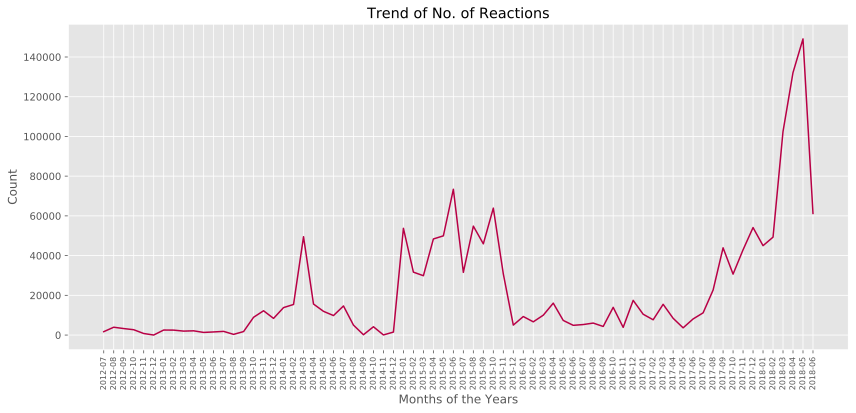

In [33]:
# Plotting the line graph
plt.figure(figsize=(14,6))
plt.plot(df_reaction_trend['month_year_published'], df_reaction_trend['num_reactions'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.title('Trend of No. of Reactions')
plt.ylabel('Count')
plt.xlabel('Months of the Years')
plt.show()

#### Discussion:
- There was a spike in number of reactions in March 2014, while 2015 and 2018 showed generally high number of reactions to posts.
- The rest of the years had relatively low number of reactions.

___

<h5> 2. WHAT IS THE OVERALL COMMENTS TREND?

In [34]:
# Grouping comments by month_year_published
df_comments_trend = df.groupby(df['month_year_published']).sum()['num_comments'].reset_index()

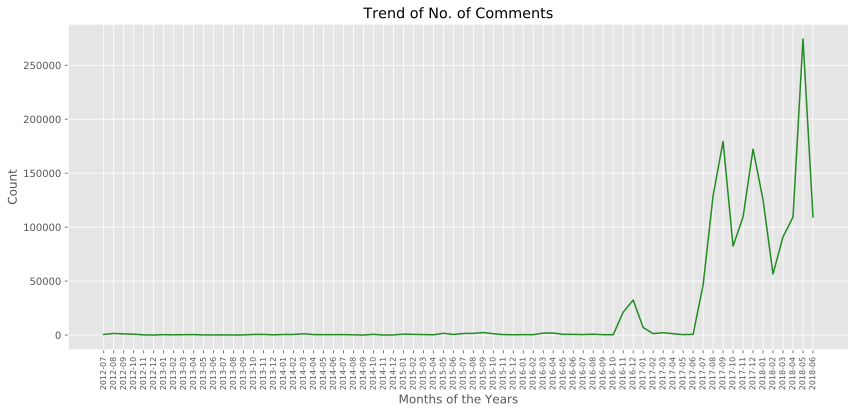

In [35]:
# Plotting the graph
plt.figure(figsize=(14,6))
plt.plot(df_comments_trend['month_year_published'], df_comments_trend['num_comments'], color='forestgreen')
plt.xticks(rotation='vertical', size=8)
plt.title('Trend of No. of Comments')
plt.ylabel('Count')
plt.xlabel('Months of the Years')
plt.show()

#### Discussion:
- The number of comments were very low across the years until July 2017. From July 2017, there was an increasing trend of comments through to June 2018.
- November and December 2016 also recorded an increased number of comments on the posts.

___

<h5> 3. WHAT IS THE OVERALL SHARES TREND?

In [36]:
# grouping shares by month_year_published
df_shares_trend = df.groupby(df['month_year_published']).sum()['num_shares'].reset_index()

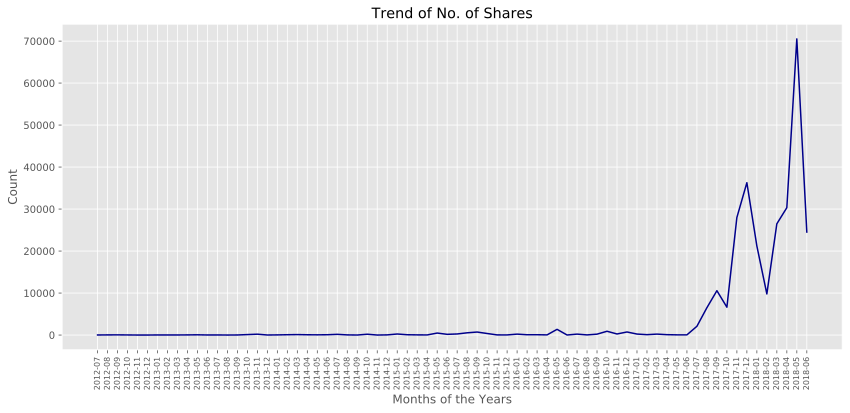

In [37]:
# Plotting the graph
plt.figure(figsize=(14,6))
plt.plot(df_shares_trend['month_year_published'], df_shares_trend['num_shares'], color='darkblue')
plt.xticks(rotation='vertical', size=8)
plt.title('Trend of No. of Shares')
plt.ylabel('Count')
plt.xlabel('Months of the Years')
plt.show()

#### Discussion:
- The number of shares on facebook posts were low across the years until August 2017 when the trend started increasing. 
- The highest spike was noticed in May 2018. 

___

<h5> 4. WHAT IS THE OVERALL ENGAGEMENT TREND?

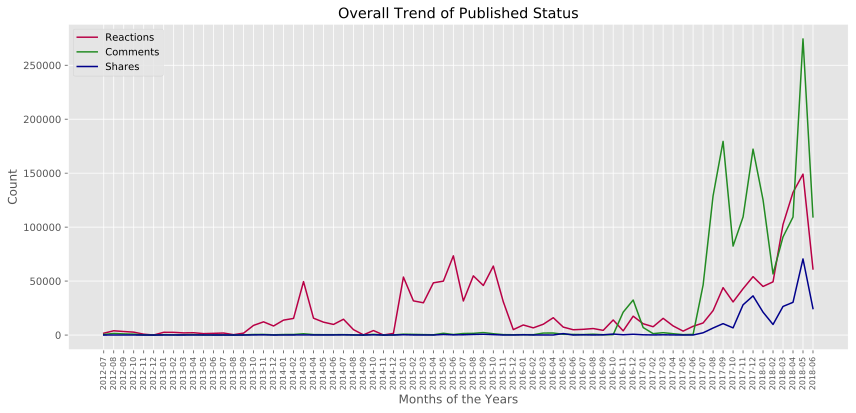

In [38]:
# Plotting the overall engagement trend based on reactions, comments and shares
plt.figure(figsize=(14,6))
plt.plot(df_reaction_trend['month_year_published'], df_reaction_trend['num_reactions'], label='Reactions', color='#b80045')
plt.plot(df_comments_trend['month_year_published'], df_comments_trend['num_comments'], label='Comments', color='forestgreen')
plt.plot(df_shares_trend['month_year_published'], df_shares_trend['num_shares'], label='Shares', color='darkblue')
plt.xlabel('Months of the Years')  # Add an x-label to the axes.
plt.ylabel('Count')  # Add a y-label to the axes.
plt.title("Overall Trend of Published Status")  # Add a title to the axes.
plt.xticks(rotation='vertical', size=8)
plt.legend()
plt.show()

#### Discussion:
- Overally, the engagement rate was high from June 2017

___

<h5> 5. WHAT IS THE DISTRIBUTION OF STATUS TYPE?

Text(0.5, 1.0, 'Distribution of Status Types')

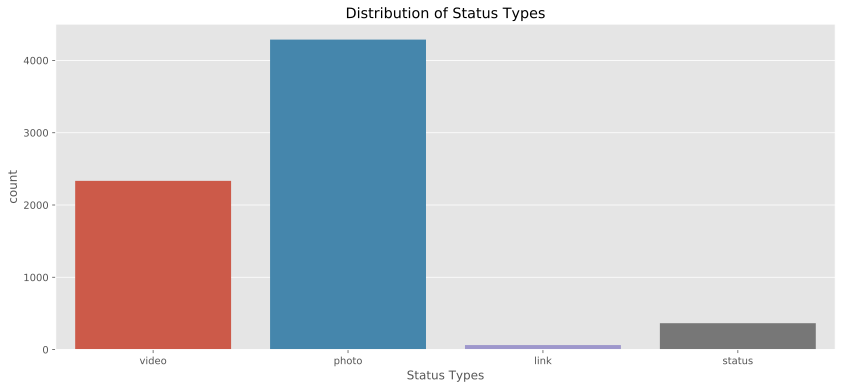

In [39]:
# Plot distribution of status type
plt.figure(figsize=(14,6))
sns.countplot(df['status_type'])
plt.xlabel('Status Types')
plt.title('Distribution of Status Types')

In [40]:
# Distribution of status type by percentage of the total
status_distribution = pd.DataFrame(df['status_type'].value_counts().reset_index().values, 
                                   columns=['status_type', 'aggregate_sum'])
status_distribution

,status_type,aggregate_sum
0,photo,4288
1,video,2334
2,status,365
3,link,63


In [41]:
# calculate pecentage distribution
status_distribution['% distribution'] = status_distribution['aggregate_sum'] / status_distribution['aggregate_sum'].sum() * 100
status_distribution

,status_type,aggregate_sum,% distribution
0,photo,4288,60.82
1,video,2334,33.11
2,status,365,5.18
3,link,63,0.89


#### Discussion:
- 60.8% of the posts were photos while 33.1% were videos.
- Links wwere the least posted status type posted with less than 1% of the total posts.

___

<h5> 5. WHAT IS THE RANK OF STATUS TYPE BY LIKES?

In [42]:
status_likes = pd.DataFrame(df.groupby(df['status_type']).sum()['num_likes'].reset_index())
status_likes

,status_type,num_likes
0,link,23286
1,photo,766602
2,status,158968
3,video,567198


In [43]:
status_sum = pd.DataFrame(df['status_type'].value_counts().reset_index().values, 
                          columns=['status_type', 'aggregate_sum_of_status'])

In [44]:
status_sum

,status_type,aggregate_sum_of_status
0,photo,4288
1,video,2334
2,status,365
3,link,63


In [45]:
df_status_likes = pd.merge(status_sum, status_likes, on='status_type')
df_status_likes

,status_type,aggregate_sum_of_status,num_likes
0,photo,4288,766602
1,video,2334,567198
2,status,365,158968
3,link,63,23286


In [46]:
# create % likes column
df_status_likes['% likes'] = df_status_likes['num_likes'] / df_status_likes['aggregate_sum_of_status'] * 100
df_status_likes

,status_type,aggregate_sum_of_status,num_likes,% likes
0,photo,4288,766602,"17,877.85"
1,video,2334,567198,"24,301.54"
2,status,365,158968,"43,552.88"
3,link,63,23286,"36,961.90"


In [47]:
# sort the table based on % likes
df_status_likes.sort_values('% likes', ascending=False)

,status_type,aggregate_sum_of_status,num_likes,% likes
2,status,365,158968,"43,552.88"
3,link,63,23286,"36,961.90"
1,video,2334,567198,"24,301.54"
0,photo,4288,766602,"17,877.85"


#### Discussion:
- Status posts had a higher likes rate than the other posts.
- Photo posts, though were proportionately higher in number, did not attract many a higher likes rate.
- Link posts performed better in terms of likes than photos and videos

___

<h5> 6. WHAT ARE THE TOP 10 MOST COMMENTED POSTS?

In [48]:
# create a df of commented posts
commented_posts = df[['status_id', 'status_type', 'num_comments']]
commented_posts

,status_id,status_type,num_comments
0,1,video,512
1,2,photo,0
2,3,video,236
3,4,photo,0
4,5,photo,0
...,...,...,...
7045,7046,photo,0
7046,7047,photo,0
7047,7048,photo,0
7048,7049,photo,12


In [49]:
# Top 10 mosts commented posts
commented_posts = commented_posts.sort_values('num_comments', ascending=False)
commented_posts[:10]

,status_id,status_type,num_comments
498,499,video,20990
480,481,video,19013
6757,6758,video,17404
3246,3247,video,12003
6762,6763,video,10960
6799,6800,video,10926
6659,6660,photo,10194
6448,6449,video,10186
6775,6776,video,9831
3892,3893,video,9452


#### Discussion:
- Posts with status_id 499 was the most commented posts, with a total of 20990 comments!. 
- Out of the top 10 posts with most comments, 9 of them were videos.

___

<h5> 7. WHAT ARE THE TOP 10 MOST SHARED POSTS?

In [50]:
# Create status df
shared_status = df[['status_id', 'status_type', 'num_shares']]
shared_status

,status_id,status_type,num_shares
0,1,video,262
1,2,photo,0
2,3,video,57
3,4,photo,0
4,5,photo,0
...,...,...,...
7045,7046,photo,0
7046,7047,photo,0
7047,7048,photo,0
7048,7049,photo,22


In [51]:
# Sort posts by num shares and get th top 10 posts
shared_status.sort_values('num_shares', ascending=False)[:10]

,status_id,status_type,num_shares
4543,4544,video,3424
4518,4519,video,2139
3876,3877,video,1636
4537,4538,video,1618
4611,4612,video,1430
3898,3899,video,1412
3892,3893,video,1379
4514,4515,video,1330
726,727,photo,1260
3897,3898,video,1136


#### Discussion:
- Post with status_id 4544 was the most shared post with a total of 3424 shares. 
- Interestingly, out of the top 10 most shared posts, 9 of them were videos.

___

<h5> 8. WHAT ARE THE TOP 5 MOST LOVED PHOTOS IN 2018?

In [52]:
status2018 = df[['status_id', 'status_type', 'year_published','num_loves']]
status2018.head()

,status_id,status_type,year_published,num_loves
0,1,video,2018,92
1,2,photo,2018,0
2,3,video,2018,21
3,4,photo,2018,0
4,5,photo,2018,9


In [53]:
photo_status = status2018.query('status_type == "photo" & year_published == "2018" ')
photo_status

,status_id,status_type,year_published,num_loves
1,2,photo,2018,0
3,4,photo,2018,0
4,5,photo,2018,9
5,6,photo,2018,5
8,9,photo,2018,5
...,...,...,...,...
6555,6556,photo,2018,2
6556,6557,photo,2018,0
6558,6559,photo,2018,1
6560,6561,photo,2018,0


In [54]:
photo_status.sort_values('num_loves', ascending=False)[:5]

,status_id,status_type,year_published,num_loves
6523,6524,photo,2018,120
3047,3048,photo,2018,67
6248,6249,photo,2018,51
6197,6198,photo,2018,51
6179,6180,photo,2018,47


#### Discussion:
- Photos with status_ids 6524, 3048, 6249, 6198, 6180 were the top 5 most loved photos of 2018.
- photo with status_id 6524 was the most loved photo in 2018 with a total of 120 love reactions.

___

<h5> 10. WHAT ARE THE MOST LIKED STATUS TYPE BY YEAR?

In [55]:
# Group num likes by year_published and status_type
year_type_liked = pd.DataFrame(df.groupby(['year_published','status_type']).sum()['num_likes'])

In [56]:
# sort by year_published and num_likes
year_type_liked.sort_values(['year_published','num_likes'], ascending=False)

num_likes
year_published status_type           
2018           video           215482
               photo           213338
               status           39152
               link               381
2017           photo           119390
               video            95323
               status           11692
               link              1212
2016           photo            78309
               video            17424
               status            4861
               link               907
2015           photo           316681
               status          103192
               video            78417
               link             20749
2014           video           138114
               photo             3480
               link                37
2013           photo            23015
               video            22438
               status              71
2012           photo            12389

#### Discussion:
- Videos were the most liked status type in 2018 with a total of 215482 likes.
- Photos were the most liked status type in 2017, 2016, 2015, 2013 and 2012.

___

<h5> 11. WHAT IS THE DISTRIBUTION OF NEGATIVE REACTIONS BY YEAR?

In [57]:
# create a table of negative reactions by years.
negative_reactions_year = pd.DataFrame(df.groupby(['year_published']).sum()['negative_reactions'].reset_index())
negative_reactions_year

,year_published,negative_reactions
0,2012,0
1,2013,0
2,2014,0
3,2015,0
4,2016,492
5,2017,2415
6,2018,4519


Text(0.5, 1, 'Distribution of Negative Reactions by Years')

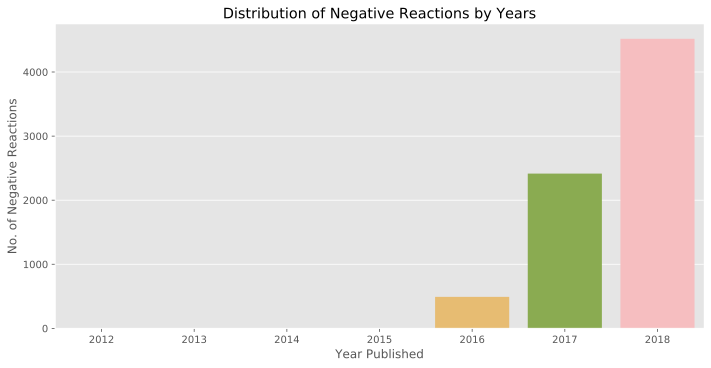

In [58]:
#plt.figure(figsize=(20,12))
sns.catplot(data=negative_reactions_year, kind="bar", x="year_published", y="negative_reactions", height=5, aspect=2)
plt.xlabel('Year Published')
plt.ylabel('No. of Negative Reactions')
plt.title('Distribution of Negative Reactions by Years')

#### Discussion:
- There were no negative reactions in 2012, 2013, 2014 and 2015.
- 2018 had the highest number of negative reactions, with a total of 4519 negative reactions.

___

<h5> 12. WHAT IS THE DISTRIBUTION OF POSITIVE REACTIONS BY YEAR?

In [59]:
positive_reactions_year = pd.DataFrame(df.groupby(['year_published']).sum()['positive_reactions'].reset_index())
positive_reactions_year.sort_values('positive_reactions', ascending=True)

,year_published,positive_reactions
0,2012,12389
1,2013,45524
4,2016,104728
2,2014,141631
5,2017,256846
3,2015,519039
6,2018,534724


Text(0.5, 1, 'Distribution of Positive Reactions by Years')

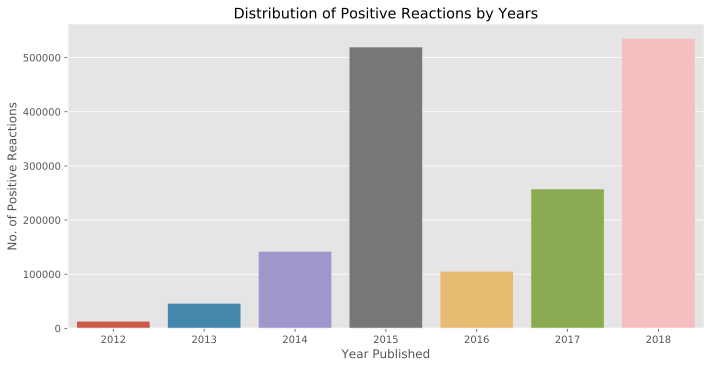

In [60]:
#plt.figure(figsize=(20,12))
sns.catplot(data=positive_reactions_year, kind="bar", x="year_published", y="positive_reactions", height=5, aspect=2)
plt.xlabel('Year Published')
plt.ylabel('No. of Positive Reactions')
plt.title('Distribution of Positive Reactions by Years')

#### Discussion:
- 2018 had the highest number of positive reactions slightly above 2015 while 2012 had the lowest number of positive reactions

___

<h5> 13. WHAT ARE THE STATUS TYPES WITH THE MOST NUMBER OF NEGATIVE REACTIONS?

In [61]:
top_negative_reactions = df.groupby(['status_type']).sum()['negative_reactions'].reset_index()
top_negative_reactions.sort_values('negative_reactions', ascending=False)

,status_type,negative_reactions
3,video,5609
1,photo,1625
2,status,190
0,link,2


___

<h5> 14. WHAT ARE THE STATUS TYPES WITH THE MOST NUMBER OF POSITIVE REACTIONS?

In [62]:
top_positive_reactions = df.groupby(['status_type']).sum()['positive_reactions'].reset_index()
top_positive_reactions.sort_values('positive_reactions', ascending=False)

,status_type,positive_reactions
1,photo,775735
3,video,655863
2,status,159966
0,link,23317


<h5> 14. WHAT IS THE TREND OF STATUS TYPE ACROSS THE YEARS BASED ON REACTIONS?

In [63]:
df_status_type_trend = df.groupby(['year_published', 'status_type']).sum()['num_reactions'].reset_index()
df_status_type_trend.head()

,year_published,status_type,num_reactions
0,2012,photo,12389
1,2013,photo,23015
2,2013,status,71
3,2013,video,22438
4,2014,link,37


In [64]:
# create df for all status types
photo_reactions = df_status_type_trend[df_status_type_trend['status_type']=='photo']
video_reactions = df_status_type_trend[df_status_type_trend['status_type']=='video']
link_reactions = df_status_type_trend[df_status_type_trend['status_type']=='link']
status_reactions = df_status_type_trend[df_status_type_trend['status_type']=='status']

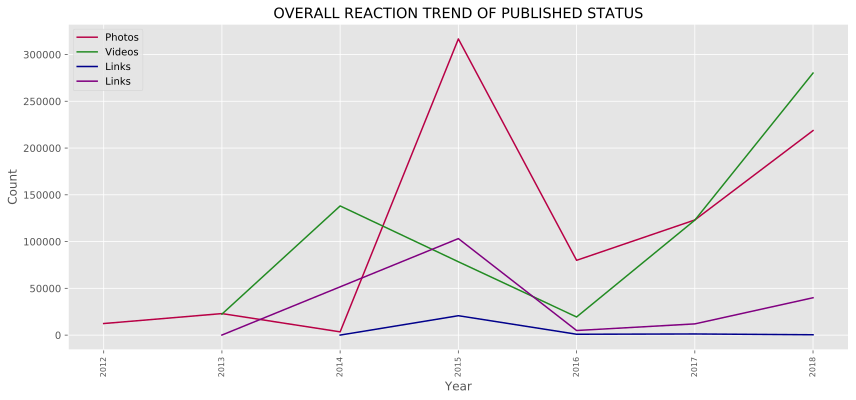

In [65]:
# Plotting the overall trend based on reactions, comments and shares
plt.figure(figsize=(14,6))
plt.plot(photo_reactions['year_published'], photo_reactions['num_reactions'], label='Photos', color='#b80045')
plt.plot(video_reactions['year_published'], video_reactions['num_reactions'], label='Videos', color='forestgreen')
plt.plot(link_reactions['year_published'], link_reactions['num_reactions'], label='Links', color='darkblue')
plt.plot(status_reactions['year_published'], status_reactions['num_reactions'], label='Links', color='purple')
plt.xlabel('Year')  # Add an x-label to the axes.
plt.ylabel('Count')  # Add a y-label to the axes.
plt.title("OVERALL REACTION TREND OF PUBLISHED STATUS")  # Add a title to the axes.
plt.xticks(rotation='vertical', size=8)
plt.legend()
plt.show()

<h5> 15. WHAT IS THE DISTRIBUTION OF POSTS BASED ON TIME OF DAY OF THEIR PUBLICATION?

In [66]:
# Create a dataframe of value_counts of time of day
time_of_day = pd.DataFrame((df['time_of_day_published']).value_counts().reset_index().values, columns=['time_of_day_published', 'aggregate_sum'])
time_of_day

,time_of_day_published,aggregate_sum
0,Late Night,3045
1,Early Morning,2314
2,Morning,834
3,Night,596
4,Noon,175
5,Evening,86


In [67]:
time_of_day['proportion of posts by time of day(%)'] = time_of_day['aggregate_sum'] / time_of_day['aggregate_sum'].sum() *100
time_of_day['proportion of posts by time of day(%)'] = time_of_day['proportion of posts by time of day(%)'].apply(lambda x: round(x,2))
time_of_day.sort_values('proportion of posts by time of day(%)', ascending=False)

,time_of_day_published,aggregate_sum,proportion of posts by time of day(%)
0,Late Night,3045,43.19
1,Early Morning,2314,32.82
2,Morning,834,11.83
3,Night,596,8.45
4,Noon,175,2.48
5,Evening,86,1.22


Text(0.5, 1, 'Proportion of Posts by Time of the Day of Publication')

<Figure size 1152x432 with 0 Axes>

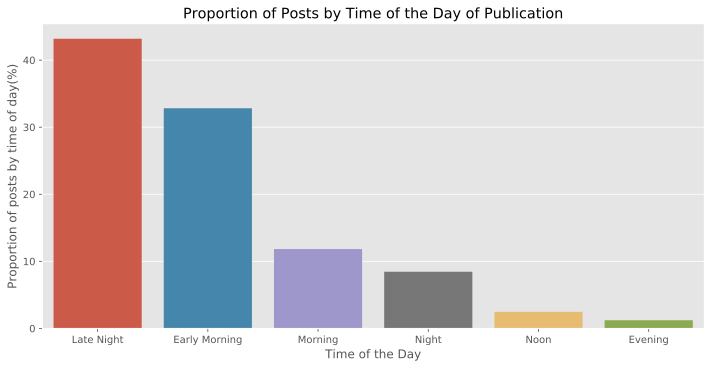

In [68]:
plt.figure(figsize=(16,6))
sns.catplot(data=time_of_day, kind='bar', x='time_of_day_published', y='proportion of posts by time of day(%)', height=5, aspect=2)
plt.xlabel('Time of the Day')
plt.ylabel('Proportion of posts by time of day(%)')
plt.title('Proportion of Posts by Time of the Day of Publication')

### Discussion:
- 43.19% of all the posts were done late night, followed by  32.82% of all te posts done early morning.
- Evening had the least number of posts with 1.22% done at that time

___

<h5> 16. WHAT ARE THE REACTIONS RATES BASED ON TIME OF DAY?

In [69]:
time_loves = df.groupby(df['time_of_day_published']).sum()['num_reactions'].reset_index()
time_loves

,time_of_day_published,num_reactions
0,Early Morning,542355
1,Evening,35968
2,Late Night,686874
3,Morning,174820
4,Night,145649
5,Noon,36660


In [70]:
time_counts = pd.DataFrame(df['time_of_day_published'].value_counts().reset_index().values, 
                           columns=['time_of_day_published', 'aggregate_sum'])
time_counts

,time_of_day_published,aggregate_sum
0,Late Night,3045
1,Early Morning,2314
2,Morning,834
3,Night,596
4,Noon,175
5,Evening,86


In [71]:
time_loves_count = pd.merge(time_counts, time_loves, on='time_of_day_published')
time_loves_count

,time_of_day_published,aggregate_sum,num_reactions
0,Late Night,3045,686874
1,Early Morning,2314,542355
2,Morning,834,174820
3,Night,596,145649
4,Noon,175,36660
5,Evening,86,35968


In [72]:
time_loves_count['% reactions'] = time_loves_count['num_reactions'] / time_loves_count['aggregate_sum'] * 100
time_loves_count

,time_of_day_published,aggregate_sum,num_reactions,% reactions
0,Late Night,3045,686874,"22,557.44"
1,Early Morning,2314,542355,"23,437.99"
2,Morning,834,174820,"20,961.63"
3,Night,596,145649,"24,437.75"
4,Noon,175,36660,"20,948.57"
5,Evening,86,35968,"41,823.26"


In [73]:
time_loves_count.sort_values('% reactions', ascending=False)

,time_of_day_published,aggregate_sum,num_reactions,% reactions
5,Evening,86,35968,"41,823.26"
3,Night,596,145649,"24,437.75"
1,Early Morning,2314,542355,"23,437.99"
0,Late Night,3045,686874,"22,557.44"
2,Morning,834,174820,"20,961.63"
4,Noon,175,36660,"20,948.57"


#### Discussion:
- From the analysis, I noticed that posts done in the evening had a better engagement(reactions) with 41823.3% reaction rate compared to the ones done other times of the day. Also, I realised that in as much as most of the posts were done late night, they did not attract most more reactions. 

- Further more, posts done in the morning and noon did not perform so well. This may be attributed to the fact that those are the times most people are busy at their work places.

___

<h5> 17. WHAT IS THE REACTIONS RATE BASED ON THE DAY OF THE WEEK THE POSTS WERE DONE?

In [74]:
days = pd.DataFrame(df.groupby('day').sum()['num_reactions'].reset_index())
days

,day,num_reactions
0,Weekday,1144984
1,Weekend,477342


In [75]:
days_count = pd.DataFrame(df['day'].value_counts().reset_index().values, columns=['day', 'aggregate_sum'])
days_count

,day,aggregate_sum
0,Weekday,5009
1,Weekend,2041


In [76]:
days_df = pd.merge(days, days_count, on='day')
days_df

,day,num_reactions,aggregate_sum
0,Weekday,1144984,5009
1,Weekend,477342,2041


In [77]:
days_df['reaction_rate(%)'] = days_df['num_reactions'] / days_df['aggregate_sum'] * 100
days_df

,day,num_reactions,aggregate_sum,reaction_rate(%)
0,Weekday,1144984,5009,"22,858.53"
1,Weekend,477342,2041,"23,387.65"


#### Discussion:
- Where as there were more posts done during weekdays, the reactions were higher for the weekend posts with 529% higher than weekdays. 

___

<h5> 18. WHAT ARE THE RELATIONSHIPS BETWEEN FEATURES IN THE DATASET? 

In [78]:
# create a correlation matrix
corr_matrix = df.corr()
corr_matrix

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,positive_reactions,negative_reactions,hour_published,days_of_week(digits)
num_reactions,1.00,0.15,0.25,0.99,0.31,0.27,0.18,0.08,0.12,1.00,0.19,0.02,0.02
num_comments,0.15,1.00,0.64,0.10,0.52,0.16,0.33,0.24,0.23,0.15,0.39,0.00,0.02
num_shares,0.25,0.64,1.00,0.17,0.82,0.41,0.40,0.20,0.31,0.25,0.45,-0.05,0.01
num_likes,0.99,0.10,0.17,1.00,0.21,0.21,0.12,0.05,0.09,1.00,0.13,0.02,0.02
num_loves,0.31,0.52,0.82,0.21,1.00,0.51,0.51,0.21,0.37,0.30,0.56,-0.04,0.01
num_wows,0.27,0.16,0.41,0.21,0.51,1.00,0.29,0.09,0.18,0.27,0.30,-0.00,0.00
num_hahas,0.18,0.33,0.40,0.12,0.51,0.29,1.00,0.14,0.21,0.17,0.92,-0.01,0.01
num_sads,0.08,0.24,0.20,0.05,0.21,0.09,0.14,1.00,0.14,0.07,0.48,0.02,0.01
num_angrys,0.12,0.23,0.31,0.09,0.37,0.18,0.21,0.14,1.00,0.12,0.38,-0.01,-0.00
positive_reactions,1.00,0.15,0.25,1.00,0.30,0.27,0.17,0.07,0.12,1.00,0.18,0.02,0.02


Text(0.5, 1, 'Correlation of Features')

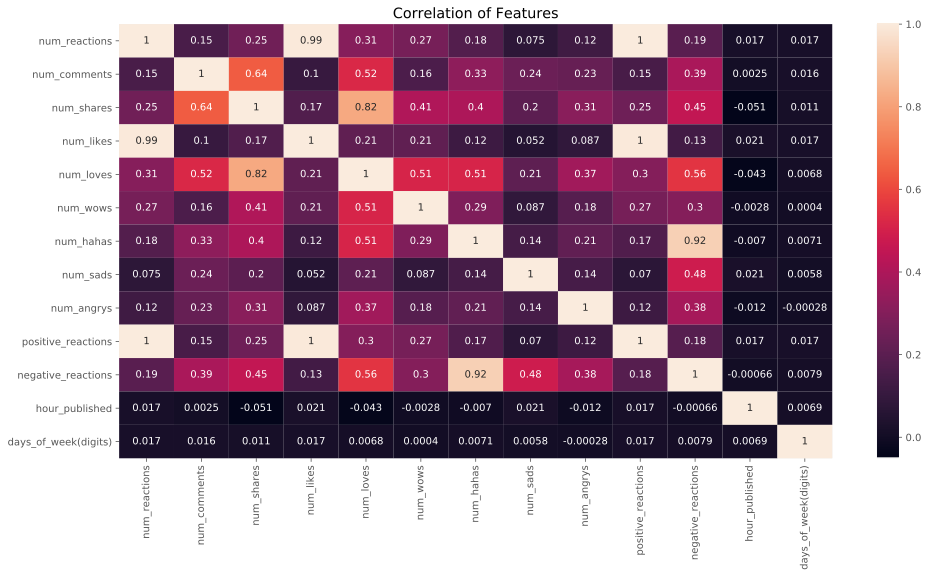

In [79]:
# plot the correlation matrix on a heatmap
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation of Features')

In [80]:
# how features correlate with num_reactions
corr_matrix['num_reactions'].sort_values(ascending=False).head()

num_reactions        1.00
positive_reactions   1.00
num_likes            0.99
num_loves            0.31
num_wows             0.27
Name: num_reactions, dtype: float64

In [81]:
# how features correlate with num_shares
corr_matrix['num_shares'].sort_values(ascending=False).head()

num_shares           1.00
num_loves            0.82
num_comments         0.64
negative_reactions   0.45
num_wows             0.41
Name: num_shares, dtype: float64

In [82]:
# how features correlate with num_comments
corr_matrix['num_comments'].sort_values(ascending=False).head()

num_comments         1.00
num_shares           0.64
num_loves            0.52
negative_reactions   0.39
num_hahas            0.33
Name: num_comments, dtype: float64

#### Discussion:
Based on the 3 engagement metrics, here are their correlations:
- Number of shares have a high positive correlation with number of love, number of comments and number of negative reactions.
- Number of comments have a positive correlation with number of shares, number of loves and number of negative reactions.

___

<h5> 19. WHAT IS THE ENGAGEMENT RATES OF THE STATUS TYPES?

In [83]:
# create a df for engagement of status types
engagement_status = df[['status_type','num_reactions','num_comments','num_shares']]
engagement_status.head()

,status_type,num_reactions,num_comments,num_shares
0,video,529,512,262
1,photo,150,0,0
2,video,227,236,57
3,photo,111,0,0
4,photo,213,0,0


In [84]:
# group by status types
engagement_status = engagement_status.groupby(df['status_type']).sum().reset_index()
engagement_status

,status_type,num_reactions,num_comments,num_shares
0,link,23319,359,277
1,photo,777373,68580,10951
2,status,160156,13227,934
3,video,661478,1499544,269997


In [85]:
# Calculate total engagement
engagement_status['total_engagement'] = engagement_status['num_reactions'] + engagement_status['num_comments'] + engagement_status['num_reactions']
engagement_status

,status_type,num_reactions,num_comments,num_shares,total_engagement
0,link,23319,359,277,46997
1,photo,777373,68580,10951,1623326
2,status,160156,13227,934,333539
3,video,661478,1499544,269997,2822500


In [86]:
# create a df for aggregate sum of status types
new_df = pd.DataFrame(df['status_type'].value_counts().reset_index().values, columns=['status_type', 'aggregate_sum'])
new_df

,status_type,aggregate_sum
0,photo,4288
1,video,2334
2,status,365
3,link,63


In [87]:
# merge the datasets
engagement_df = pd.merge(engagement_status, new_df, on='status_type')
engagement_df

,status_type,num_reactions,num_comments,num_shares,total_engagement,aggregate_sum
0,link,23319,359,277,46997,63
1,photo,777373,68580,10951,1623326,4288
2,status,160156,13227,934,333539,365
3,video,661478,1499544,269997,2822500,2334


In [88]:
# calculate engagement rates
engagement_df['engagement_rate(%)'] = engagement_df['total_engagement'] / engagement_df['aggregate_sum'] * 100
engagement_df.sort_values('engagement_rate(%)', ascending=False)

,status_type,num_reactions,num_comments,num_shares,total_engagement,aggregate_sum,engagement_rate(%)
3,video,661478,1499544,269997,2822500,2334,"120,929.73"
2,status,160156,13227,934,333539,365,"91,380.55"
0,link,23319,359,277,46997,63,"74,598.41"
1,photo,777373,68580,10951,1623326,4288,"37,857.42"


#### Discussion:
- Videos have the highest engagement rate followed by status posts.
- Photos, though the highest in number, have the least engagement rate.

___

<h4> SUMMARY OF INSIGHTS

- Video posts have the highest engagement rate.
- Status posts have more like rates than all of the post types. 
- Posts done in the evening have the highest reaction rates followed by posts done at night.
- Posts done during the weekends have a better reaction rates than posts done on weekdays.
- A post that is loved or liked has a higher probability of being shared.

___

<h4> LIMITATIONS

Two main limitations of this project are as follows:
- It was not possible to tell te actual post that was done. For instance, it could be that more reactions were made on a photo/video of particular type of fashion or cosmetic product. Specific type of a product could have a bearing on the engagement rate of the post.
- The data did not provide the variable for the retailers. This might have helped to understand whether a retailer had an influence on the engagement rates of their posts.

___

___